# Title

## Setup and Helper Functions

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from fau_colors import cmaps, register_fausans_font

from pepbench.algorithms.ecg import QPeakExtractionForouzanfar2018
from pepbench.algorithms.icg import BPointExtractionLozano2007QuadraticRegression, CPointExtractionScipyFindPeaks
from pepbench.datasets import GuardianDataset
from pepbench.plotting import algorithms, plot_signals_with_algorithm_results

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [3]:
deploy_type = "local"

config_dict = json.load(Path("./config.json").open(encoding="utf-8"))

guardian_base_path = Path(config_dict[deploy_type]["guardian_path"])
guardian_base_path

PosixPath('/Users/richer/Documents/PhD/Projects/EmpkinS/HealthPsychology_D03/Data/2024_08_PEP_Benchmarking/Guardian_Dataset')

## Guardian Dataset

In [4]:
dataset_guardian = GuardianDataset(guardian_base_path, use_cache=True, only_labeled=True)
dataset_guardian

,participant,phase
0,GDN0005,Pause
1,GDN0005,Valsalva
2,GDN0005,HoldingBreath
3,GDN0005,TiltUp
4,GDN0005,TiltDown
...,...,...
101,GDN0029,TiltUp
102,GDN0029,TiltDown
103,GDN0030,Valsalva
104,GDN0030,HoldingBreath


In [5]:
subset = dataset_guardian.get_subset(participant="GDN0005", phase="Pause")

labeling_borders = subset.labeling_borders
reference_labels_icg = subset.reference_labels_icg
reference_labels_ecg = subset.reference_labels_ecg
ecg_data = subset.ecg
icg_data = subset.icg
ecg = subset.ecg
icg = subset.icg
heartbeats = subset.heartbeats

display(labeling_borders)
display(reference_labels_ecg)

,description,sample_absolute,sample_relative
timestamp,,,
2018-02-16 09:58:32.160000+01:00,{'Pause': 'start'},127245,127245
2018-02-16 09:59:32.160000+01:00,{'Pause': 'end'},157245,157245


sample_absolute  sample_relative
heartbeat_id channel   label                                         
0            heartbeat start                  127597              352
             ECG       Q-wave_onset           127737              492
             heartbeat end                    128053              808
1            heartbeat start                  128053              808
             ECG       Q-wave_onset           128193              948
...                                              ...              ...
62           ECG       Q-wave_onset           156070            28825
             heartbeat end                    156417            29172
63           heartbeat start                  156417            29172
             ECG       Q-wave_onset           156574            29329
             heartbeat end                    156901            29656

[192 rows x 2 columns]

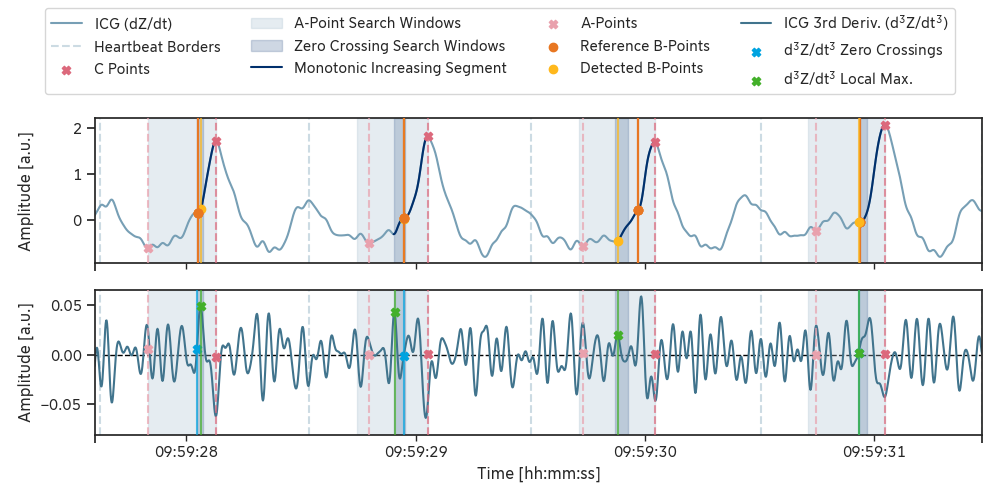

In [63]:
fig, ax = algorithms.plot_b_point_extraction_forouzanfar2018(subset, heartbeat_subset=(59, 63))

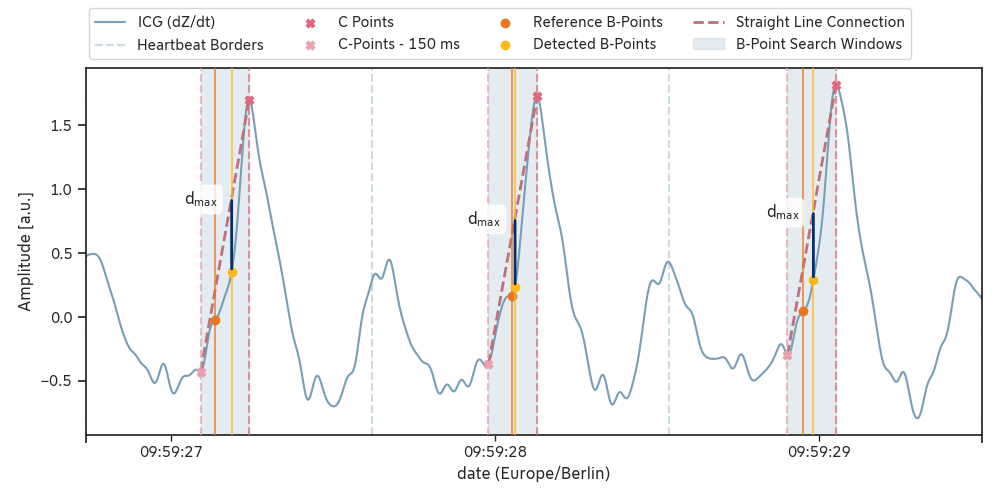

In [64]:
fig, ax = algorithms.plot_b_point_extraction_drost2022(subset, heartbeat_subset=(59, 61))

## Plot Tests

## Algorithm Tests

In [ ]:
q_peak_algo = QPeakExtractionForouzanfar2018(handle_missing_events="warn")
q_peak_algo.extract(ecg=ecg, heartbeats=heartbeats, sampling_rate_hz=subset.sampling_rate_ecg)
q_peak_algo.points_

In [ ]:
fig, ax = plot_signals_with_algorithm_results(subset, algorithm=q_peak_algo, heartbeat_subset=(0, 5), collapse=False)

In [ ]:
c_point_algo = CPointExtractionScipyFindPeaks(handle_missing_events="warn")
c_point_algo.extract(icg=icg, heartbeats=heartbeats, sampling_rate_hz=subset.sampling_rate_icg)
b_point_algo = BPointExtractionLozano2007QuadraticRegression(moving_average_window=3, handle_missing_events="warn")
b_point_algo.extract(
    icg=icg, heartbeats=heartbeats, c_points=c_point_algo.points_, sampling_rate_hz=subset.sampling_rate_icg
)
b_point_algo.points_

In [ ]:
fig, ax = plot_signals_with_algorithm_results(subset, algorithm=b_point_algo, heartbeat_subset=(0, 5), collapse=False)

In [ ]:
fig, ax = algorithms.plot_q_peak_extraction_forounzafar2018(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_lozano2007_quadratic_regression(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_sherwood1990(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, axs = algorithms.plot_b_point_extraction_stern1985(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_arbol2017_isoelectric_crossings(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_arbol2017_second_derivative(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_arbol2017_third_derivative(subset, heartbeat_subset=(59, 63))

In [ ]:
fig, ax = algorithms.plot_b_point_extraction_drost2022(subset, heartbeat_subset=(59, 63))